In [64]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import torch

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils, backend as K

from keras.models import Model
from keras.layers import Input, Dense

In [65]:
#labels
labeldict = {
0 : "Bring",
1 : "Clean Floor",
2 : "Clean Surface",
4 : "Close Door",
5 : "Close Drawer",
6 : "Close Lid By Rotate",
7 : "Close Other Lid",
8 : "Close Small Box",
9 : "Close Tap Water",
10 : "Drink",
11 : "Dry Off Hands",
12 : "Dry Off Hands By Shake",
13 : "Eat Small",
14 : "Gargle",
15 : "Getting Up",
16 : "Hang",
17 : "Lying Down",
18 : "Open Bag",
19 : "Open Big Box",
20 : "Open Door",
21 : "Open Drawer",
22 : "Open Lid By Rotate",
23 : "Open Other Lid",
24 : "Open Small Box",
25 : "Open Tap Water",
26 : "Plug In",
27 : "Press by Grasp",
28 : "Press From Top",
29 : "Press Switch",
30 : "Put From Bottle",
31 : "Put From Tap Water",
32 : "Put High Position",
33 : "Put On Floor",
34 : "Read",
35 : "Rotate",
36 : "Rub Hands",
37 : "Scoop And Put",
38 : "Sitting Down",
39 : "Squatting Down",
40 : "Standing Up",
41 : "Stand Up From Squatting",
42 : "Take From Floor",
43 : "Take From High Position",
44 : "Take Off Jacket",
45 : "Take Out",
46 : "Talk By Telephone",
47 : "Throw Out",
48 : "Throw Out Water",
49 : "Touch Smartphone Screen",
50 : "Type",
51 : "Unhang",
52 : "Unplug",
53 : "Wear Jacket",
54 : "Write"
}

#load data
#training
train_acc = np.load('training/trainAccelerometer.npy')
train_gra = np.load('training/trainGravity.npy')
train_gyr = np.load('training/trainGyroscope.npy')
train_lin = np.load('training/trainLinearAcceleration.npy')

train_mag = np.load('training/trainMagnetometer.npy') #load 800 Hz version

trainJins_acc = np.load('training/trainJinsAccelerometer800.npy')
trainJins_gyr = np.load('training/trainJinsGyroscope800.npy')

trainMS_acc = np.load('training/trainMSAccelerometer800.npy')
trainMS_gyr = np.load('training/trainMSGyroscope800.npy')

train_label = np.load('training/trainLabels.npy')

#train_data = [train_acc, train_gra, train_gyr, train_lin, train_mag, trainJins_acc, trainJins_gyr, trainMS_acc, trainMS_gyr]

test_acc = np.load('testing/testAccelerometer.npy')
test_gra = np.load('testing/testGravity.npy')
test_gyr = np.load('testing/testGyroscope.npy')
test_mag = np.load('testing/testMagnetometer.npy') #load 800 Hz version
test_lin = np.load('testing/testLinearAcceleration.npy')

testJins_acc = np.load('testing/testJinsAccelerometer800.npy')
testJins_gyr = np.load('testing/testJinsGyroscope800.npy')

testMS_acc = np.load('testing/testMSAccelerometer800.npy')
testMS_gyr = np.load('testing/testMSGyroscope800.npy')

test_label = np.load('testing/testLabels.npy')

#test_data = [test_acc, test_gra, test_gyr, test_lin, test_mag, testJins_acc, testJins_gyr, testMS_acc, testMS_gyr]

In [71]:
#create input feature vector

#train vector
train_data = [train_gyr, train_lin, trainJins_acc, trainJins_gyr, trainMS_acc, trainMS_gyr] #add train_mag

train_features = np.append(train_acc, train_gra, axis=2)
for i in train_data:
    train_features = np.append(train_features, i, axis=2)

print(train_features.shape)
#print(train_features)


#test vector
test_data = [ test_gyr, test_lin, testJins_acc, testJins_gyr, testMS_acc, testMS_gyr] # add test_mag
test_features = np.append(test_acc, test_gra, axis =2)
for i in test_data:
    test_features = np.append(test_features, i, axis=2)

print(test_features.shape)
print(test_features.dtype)
#print(test_features[0])

(2284, 800, 24)
(2288, 800, 24)
float32


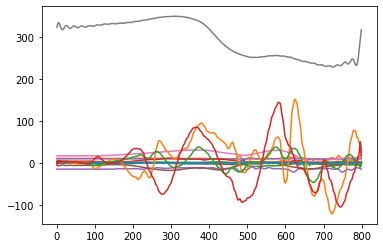

Bring


In [67]:
#print(test_label)
#print(train_features)
#all samples of first activity
n = 0
plt.plot(train_features[n])
plt.show()
print(labeldict[n])

In [79]:
#create model
#number of hidden layer: around (number of inputs + 1)/2

#(input: ?-dimensional vectors) 
#       ↧
#[Conv (? units, ? activation)] #round((n_features+1)/2)
#       ↧
#[Max-Pooling (? units, ? activation)]
#.
#.
#.
#       ↧
#[Dense (54 units, softmax activation)]
#       ↧
#(output: integer for human activity (0-54))

#train and evaluate
def train_evaluate(X_train, Y_train, X_test, Y_test):
    #create layers
    #ToDo: add bias and change shape to correct dimension
    inputs = keras.layers.Input(shape=(800, 24), dtype='float32', name='input_layer') #Input layer
    outputs = keras.layers.Dense(1142, activation='relu', name='hidden_layer')(inputs) # Hidden layer
    outputs = keras.layers.Dense(1, activation='softmax', name='output_layer')(outputs) # Output layer (55 labels)

    # Create a model from input layer and output layers
    model = keras.models.Model(inputs=inputs, outputs=outputs, name='DeepNN')
    
    model.summary()
    
    # Compile the model
    model.compile(loss= keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy']) # another optimizer=keras.optimizers.RMSprop()
    
    # Train the model on the train set
    model.fit(X_train, Y_train, batch_size=64, epochs=2, verbose=1)


def main():
    X_train = train_features
    Y_train = train_label
    
    X_test = test_features
    Y_test = test_label
    
    # Train and evaluate
    train_evaluate(X_train, Y_train, X_test, Y_test)
    
if __name__ == "__main__": main()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 800, 24)]         0         
                                                                 
 hidden_layer (Dense)        (None, 800, 1142)         28550     
                                                                 
 output_layer (Dense)        (None, 800, 1)            1143      
                                                                 
Total params: 29,693
Trainable params: 29,693
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2


ValueError: in user code:

    File "C:\Users\jasmi\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\jasmi\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jasmi\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\jasmi\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\jasmi\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\jasmi\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\jasmi\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\jasmi\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\jasmi\anaconda3\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\jasmi\anaconda3\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None,) and (None, 800, 1) are incompatible
